In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

cr = pd.read_csv("CreditRisk.csv")
df=cr.copy()

In [40]:
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4.0,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


# Problem Statement1 : To create a predictive model which can predict the loan status
# Problem Statement2 : To create a model for running a marketing (sales campaign) for the good customers

In [41]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("Yes")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed.fillna("Yes", inplace=True)
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

# EDA

In [43]:
cr.groupby('Loan_Status')['Property_Area'].value_counts()

Loan_Status  Property_Area
N            Rural            103
             Urban             90
             Semiurban         76
Y            Semiurban        273
             Urban            252
             Rural            187
Name: Property_Area, dtype: int64

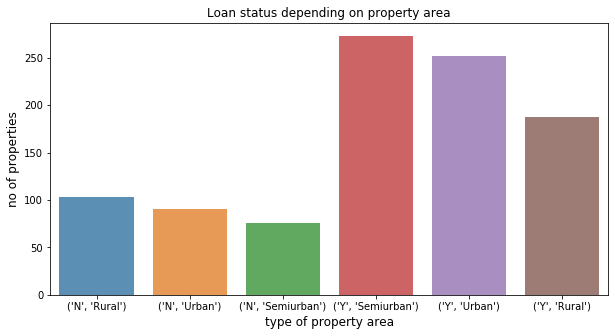

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(cr.groupby('Loan_Status')['Property_Area'].value_counts().index, cr.groupby('Loan_Status')['Property_Area'].value_counts().values, alpha=0.8)
plt.title('Loan status depending on property area')
plt.ylabel('no of properties', fontsize=12)
plt.xlabel('type of property area', fontsize=12)
plt.show()

In [45]:
## can conclude that rural properties are rejected for most loans whereas semiurban gets more prefernece than urban

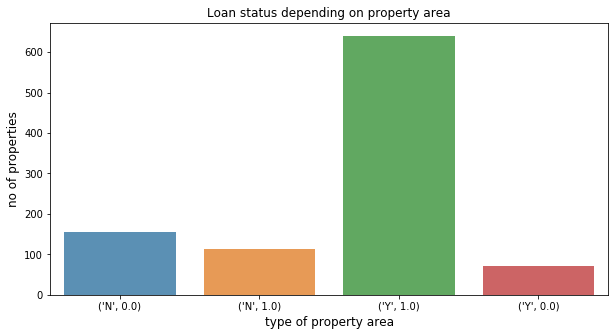

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(cr.groupby('Loan_Status')['Credit_History'].value_counts().index, cr.groupby('Loan_Status')['Credit_History'].value_counts().values, alpha=0.8)
plt.title('Loan status depending on property area')
plt.ylabel('no of properties', fontsize=12)
plt.xlabel('type of property area', fontsize=12)
plt.show()

In [47]:
#shows that credit history plays a mjor role in approving loan status

In [48]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
cr = cr.iloc[ : , 1 : ]

In [50]:
cr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.000000,142.51153,360.000000,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.000000,128.00000,360.000000,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.000000,66.00000,360.000000,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.000000,120.00000,360.000000,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.000000,141.00000,360.000000,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.000000,267.00000,360.000000,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.000000,95.00000,360.000000,1.0,Urban,Y
7,Male,Yes,4.0,Graduate,No,3036,2504.000000,158.00000,360.000000,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.000000,168.00000,360.000000,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.000000,349.00000,360.000000,1.0,Semiurban,N


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cr[cr.select_dtypes(include=['object']).columns] = cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [52]:
cr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.000000,142.51153,360.000000,1.0,2,1
1,1,1,1.0,0,0,4583,1508.000000,128.00000,360.000000,1.0,0,0
2,1,1,0.0,0,1,3000,0.000000,66.00000,360.000000,1.0,2,1
3,1,1,0.0,1,0,2583,2358.000000,120.00000,360.000000,1.0,2,1
4,1,0,0.0,0,0,6000,0.000000,141.00000,360.000000,1.0,2,1
5,1,1,2.0,0,1,5417,4196.000000,267.00000,360.000000,1.0,2,1
6,1,1,0.0,1,0,2333,1516.000000,95.00000,360.000000,1.0,2,1
7,1,1,4.0,0,0,3036,2504.000000,158.00000,360.000000,0.0,1,0
8,1,1,2.0,0,0,4006,1526.000000,168.00000,360.000000,1.0,2,1
9,1,1,1.0,0,0,12841,10968.000000,349.00000,360.000000,1.0,1,0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
cr_train , cr_test = train_test_split(cr, test_size = .2, random_state = 111)

In [55]:
cr_train_x = cr_train.iloc[ : , 0 : -1 ]
cr_train_y = cr_train.iloc[ : , -1 ]

In [56]:
cr_test_x = cr_test.iloc[ : , 0 : -1 ]
cr_test_y = cr_test.iloc[ : , -1 ]

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
logreg.fit(cr_train_x, cr_train_y)

C:\Users\tanma\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [59]:
pred_cr = logreg.predict(cr_test_x)

In [60]:
pred_cr

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
tab_cr = confusion_matrix(pred_cr, cr_test_y)     # confusion_matrix(side {predicted}, top {actual}) 
tab_cr

array([[ 25,  13],
       [ 29, 130]], dtype=int64)

In [63]:
tab_cr.sum()

197

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(pred_cr, cr_test_y)

0.7868020304568528

In [66]:
# Predictions can also be done in probability

pred_prob = logreg.predict_proba(cr_test_x)
pred_prob

array([[0.16452681, 0.83547319],
       [0.07452388, 0.92547612],
       [0.11508332, 0.88491668],
       [0.30453669, 0.69546331],
       [0.15729851, 0.84270149],
       [0.18303526, 0.81696474],
       [0.52300338, 0.47699662],
       [0.17116089, 0.82883911],
       [0.2055489 , 0.7944511 ],
       [0.13945152, 0.86054848],
       [0.09545292, 0.90454708],
       [0.28283218, 0.71716782],
       [0.18595957, 0.81404043],
       [0.24772448, 0.75227552],
       [0.06134167, 0.93865833],
       [0.14634967, 0.85365033],
       [0.71565783, 0.28434217],
       [0.44717305, 0.55282695],
       [0.52970064, 0.47029936],
       [0.14816658, 0.85183342],
       [0.63947601, 0.36052399],
       [0.12680379, 0.87319621],
       [0.24655212, 0.75344788],
       [0.08110554, 0.91889446],
       [0.25827827, 0.74172173],
       [0.40347719, 0.59652281],
       [0.11805234, 0.88194766],
       [0.13060679, 0.86939321],
       [0.79604702, 0.20395298],
       [0.2301863 , 0.7698137 ],
       [0.

In [67]:
###################################################################################################################################

In [68]:
# Running probability on full data to get the insights about good customers

In [69]:
cr_x = pd.concat([cr_train_x , cr_test_x])     # merging train & test to run probabilty of loan ID of customners on whole data set
cr_x.shape

(981, 11)

In [70]:
pred_prob_cr = logreg.predict_proba(cr_x)
pred_prob_cr

array([[0.69999407, 0.30000593],
       [0.12899528, 0.87100472],
       [0.5799884 , 0.4200116 ],
       ...,
       [0.79406811, 0.20593189],
       [0.10246639, 0.89753361],
       [0.15185408, 0.84814592]])

In [71]:
pred_prob_cr = pd.DataFrame(pred_prob_cr)

In [77]:
prob_id = pd.DataFrame({"Customer_Id" : df.Loan_ID , "Probability" : pred_prob_cr.iloc[ : , 1 ]})

In [78]:
prob_id = prob_id.sort_values("Probability" , ascending=False)

In [79]:
print("Hight probabilties of customers for loan applicability")
prob_id

Hight probabilties of customers for loan applicability


,Customer_Id,Probability
525,LP002699,0.968024
99,LP001343,0.967563
575,LP002868,0.967442
834,LP002212,0.966271
146,LP001516,0.960586
493,LP002582,0.960233
422,LP002361,0.959629
251,LP001836,0.959233
69,LP001241,0.958044
350,LP002139,0.957835


In [85]:
prob_id.to_csv(r"Loan_Status_Probabilties.csv")     # to extract into output csv file from python

In [86]:
####################################################################################################################################

# AUROC CURVE

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(cr_test_y , pred_cr)
log_roc_auc

0.686026936026936

In [119]:
pred_prob.shape

(197, 1)

In [120]:
cr_test_y.shape

(197,)

In [122]:
pred_prob = pd.DataFrame(pred_prob)
pred_prob = pred_prob.iloc[ : , 0 ]

fpr , tpr , threshold = roc_curve(cr_test_y , pred_prob)

Text(0.5, 0.5, 'AUROC value is 0.7')

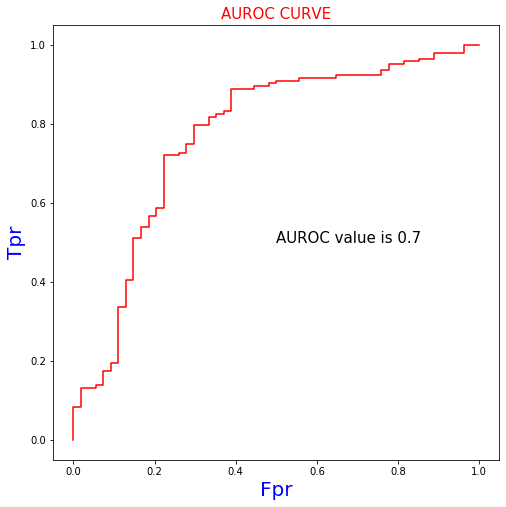

In [123]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.plot(fpr , tpr , color = "red")
plt.xlabel("Fpr" , size = 20 , color = "blue")
plt.ylabel("Tpr" , size = 20 , color = "blue")
plt.title("AUROC CURVE" , size = 15 , color = "red")
plt.text(x = .5 , y = .5 , size = 15 , s = "AUROC value is 0.7")